/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.4830 - loss: 0.6911 - val_accuracy: 0.5900 - val_loss: 0.6661
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5226 - loss: 0.6741 - val_accuracy: 0.5900 - val_loss: 0.6399
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5314 - loss: 0.6442 - val_accuracy: 0.6500 - val_loss: 0.5741
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7139 - loss: 0.5567 - val_accuracy: 0.7900 - val_loss: 0.4680
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7939 - loss: 0.4432 - val_accuracy: 0.7800 - val_loss: 0.4304
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8286 - loss: 0.3933 - val_accuracy: 0.8350 - val_loss: 0.4052
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8211 - loss: 0.3876 - val_accuracy: 0.8200 - val_loss: 0.3871
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8453 - loss: 0.3386 - val_accuracy: 0.8350 - val_los

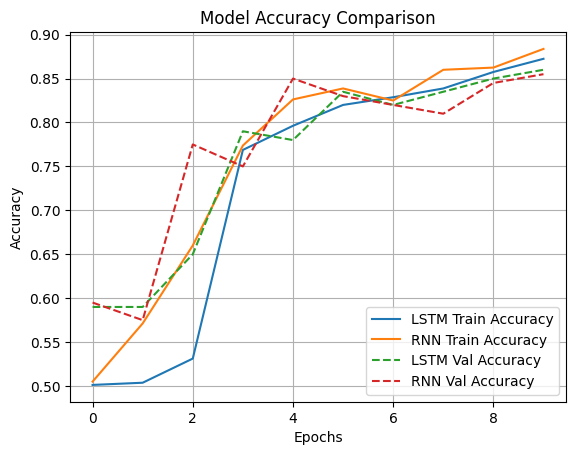

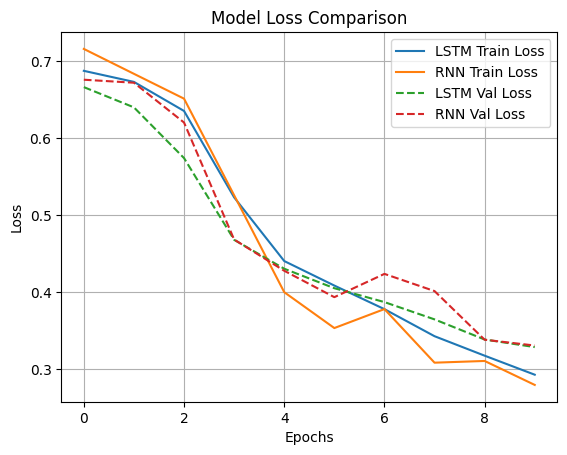

In [1]:
# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Step 2: Create synthetic sequential dataset
def generate_data(n_samples=1000, timesteps=10):
    X = np.zeros((n_samples, timesteps, 1))
    y = np.zeros((n_samples,))
    for i in range(n_samples):
        sequence = np.random.rand(timesteps)
        X[i, :, 0] = sequence
        y[i] = 1 if np.mean(sequence) > 0.5 else 0  # Simple classification task
    return X, y

X, y = generate_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build and train LSTM model
def build_lstm_model():
    model = Sequential()
    model.add(LSTM(32, input_shape=(X.shape[1], X.shape[2])))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

lstm_model = build_lstm_model()
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 4: Build and train Simple RNN model
def build_rnn_model():
    model = Sequential()
    model.add(SimpleRNN(32, input_shape=(X.shape[1], X.shape[2])))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

rnn_model = build_rnn_model()
rnn_history = rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 5: Compare performance (plot accuracy)
plt.plot(lstm_history.history['accuracy'], label='LSTM Train Accuracy')
plt.plot(rnn_history.history['accuracy'], label='RNN Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Val Accuracy', linestyle='--')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Val Accuracy', linestyle='--')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
# Step 6: Compare performance (plot loss)
plt.plot(lstm_history.history['loss'], label='LSTM Train Loss')
plt.plot(rnn_history.history['loss'], label='RNN Train Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Val Loss', linestyle='--')
plt.plot(rnn_history.history['val_loss'], label='RNN Val Loss', linestyle='--')
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


